In [ ]:
# run in terminal for xgboost api model
# uvicorn xgboost_api:app --host 0.0.0.0 --port 8084 --reload

## XGBoost

In [1]:
import requests
import matplotlib.pyplot as plt
import numpy as np

response = requests.post(
    "http://127.0.0.1:8084/predict",
    json={
        "pitch_entropy": 2.1,
        "IP_per_G": 6.5,
        "FBv": 94.2,
        "IP": 110.0,
    }
)

print(response.json())

{'Injury Risk Probability': 0.9025909304618835, 'Predicted Class': 1, 'Threshold': 0.55}


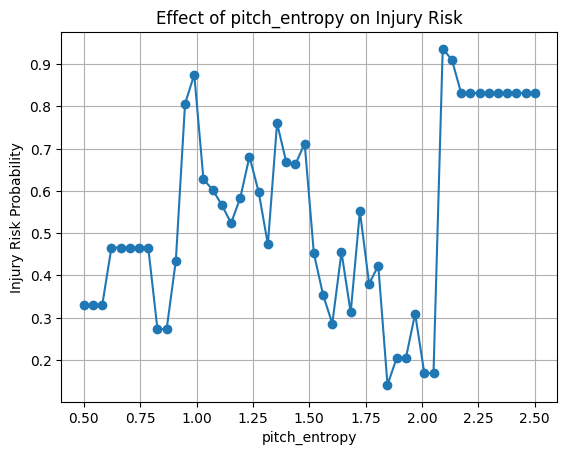

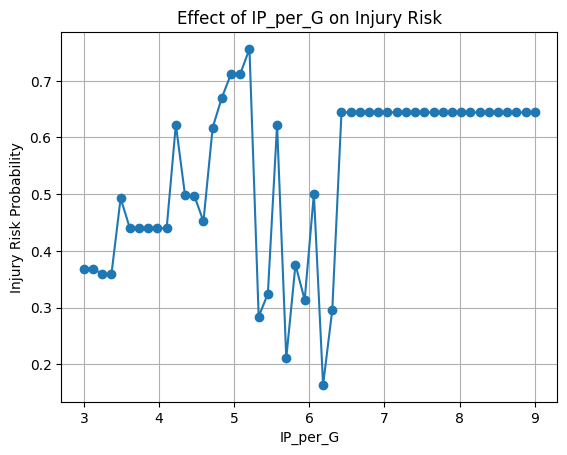

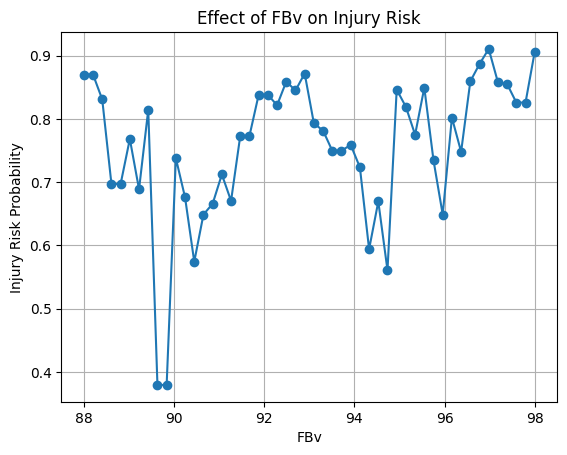

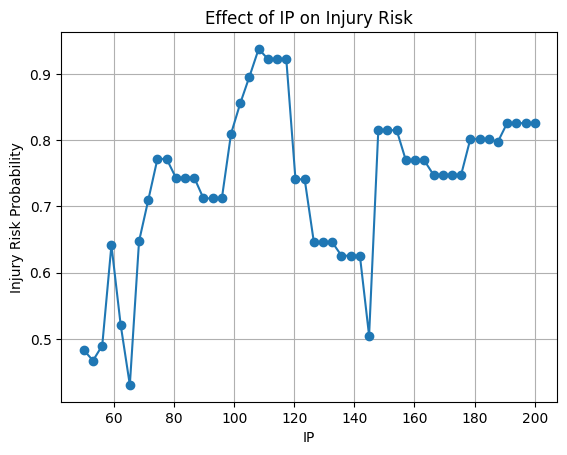

In [2]:

base_data = {
    "pitch_entropy": 1.5,
    "IP_per_G": 5.0,
    "FBv": 91.0,
    "IP": 90.0
}

feature_ranges = {
    "pitch_entropy": np.linspace(0.5, 2.5, 50),
    "IP_per_G": np.linspace(3, 9, 50),
    "FBv": np.linspace(88, 98, 50),
    "IP": np.linspace(50, 200, 50)
}

results = {}

for feature, values in feature_ranges.items():
    probs = []
    for v in values:
        data = base_data.copy()
        data[feature] = float(v)

        try:
            response = requests.post("http://127.0.0.1:8084/predict", json=data)
            prob = response.json()["Injury Risk Probability"]
            probs.append(prob)
        except Exception as e:
            print(f"Error on {feature}={v:.2f}: {e}")
            probs.append(None)

    results[feature] = (values, probs)

for feature, (x, y) in results.items():
    plt.figure()
    plt.plot(x, y, marker='o')
    plt.title(f"Effect of {feature} on Injury Risk")
    plt.xlabel(feature)
    plt.ylabel("Injury Risk Probability")
    plt.grid(True)
    plt.show()
